In [17]:
!pip install --upgrade pymorphy2 razdel

Requirement already up-to-date: pymorphy2 in /usr/local/lib/python3.6/dist-packages (0.8)
Requirement already up-to-date: razdel in /usr/local/lib/python3.6/dist-packages (0.5.0)


In [0]:
from collections import Counter, namedtuple
import pymorphy2
import razdel
import numpy as np
import matplotlib.pyplot as plt

In [0]:
USEFUL_POS = ['NOUN', 'ADJF', 'ADJS', 'COMP',
              'VERB', 'INFN', 'PRTF', 'PRTS', 
              'GRND', 'ADVB', 'NPRO', 'PRED']

Stats = namedtuple("Stats", "vocabulary, lemma_vocabulary, words_counts, unique_words_counts")

In [0]:
def collect_statistics(data, max_words):
    pm = pymorphy2.MorphAnalyzer()
    stats = Stats(Counter(),  Counter(), list(), list())
    for text in data:
        process_text(text, stats, max_words, pm)
    return stats


def process_text(text, text_stats, max_words, analyzer):
    words = [word.text for word in razdel.tokenize(text)][:max_words]
    lemmas = [analyzer.parse(word)[0] for word in words]
    lemmas = [lemma for lemma in lemmas if lemma.tag.POS in USEFUL_POS]
    words = [lemma.word for lemma in lemmas]
    lemmas = [lemma.normal_form for lemma in lemmas]
    text_stats.vocabulary.update(words)
    text_stats.lemma_vocabulary.update(lemmas)
    text_stats.words_counts.append(len(words))
    text_stats.unique_words_counts.append(len(set(words)))


def draw_stat_hists(data, bins=10, label=None):
    words = data.words_counts
    uwords = data.unique_words_counts
    if label is not None:
        label = " in single " + label
    else:
        label = ""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    ax1.hist(words, bins)
    ax1.set_title("Words" + label)
    ax1.set_xlabel("Num of words")
    ax1.set_ylabel("Examples")
    ax2.hist(uwords, bins)
    ax2.set_title("Unique words" + label)
    ax2.set_xlabel("Num of words")
    ax2.set_ylabel("Examples")
    plt.show()

In [0]:
examples = 30000
indices = np.random.randint(len(cleaned_dataset), size=examples)
text_data = cleaned_dataset['Text'].values[indices]
header_data = cleaned_dataset['Head_title'].values[indices]

In [22]:
%%time
text_stats = collect_statistics(text_data, max_words=3000)
header_stats = collect_statistics(header_data, max_words=3000)

CPU times: user 35min 57s, sys: 370 ms, total: 35min 58s
Wall time: 35min 59s


In [23]:
print("Texts vocabulary size: ", len(text_stats.vocabulary))
print("Texts lemma vocabulary size: ", len(text_stats.lemma_vocabulary))
print("Headers vocabulary size: ", len(header_stats.vocabulary))
print("Headers lemma vocabulary size: ", len(header_stats.lemma_vocabulary))
print("Common lemmas headers vs texts: ", len(set(header_stats.lemma_vocabulary.keys()) & set(text_stats.lemma_vocabulary.keys())))

Texts vocabulary size:  338343
Texts lemma vocabulary size:  147944
Headers vocabulary size:  37788
Headers lemma vocabulary size:  18631
Common lemmas headers vs texts:  18237


In [24]:
text_stats.lemma_vocabulary.most_common(30)

[('быть', 79915),
 ('он', 63679),
 ('год', 56971),
 ('который', 50501),
 ('весь', 40605),
 ('они', 38087),
 ('один', 37033),
 ('тот', 34258),
 ('мы', 32137),
 ('это', 30364),
 ('свой', 27379),
 ('этот', 26415),
 ('я', 25944),
 ('россия', 25363),
 ('она', 24544),
 ('человек', 24467),
 ('мочь', 21125),
 ('такой', 19323),
 ('стать', 18901),
 ('уже', 18534),
 ('время', 17965),
 ('российский', 14597),
 ('страна', 14466),
 ('наш', 14339),
 ('самый', 14171),
 ('работа', 13679),
 ('другой', 13582),
 ('большой', 13386),
 ('тысяча', 12733),
 ('более', 12612)]

In [25]:
header_stats.lemma_vocabulary.most_common(30)

[('россия', 1314),
 ('москва', 962),
 ('человек', 820),
 ('коронавирус', 795),
 ('назвать', 787),
 ('путин', 766),
 ('сша', 756),
 ('год', 734),
 ('рассказать', 613),
 ('один', 575),
 ('быть', 561),
 ('стать', 534),
 ('рф', 533),
 ('новый', 500),
 ('область', 480),
 ('найти', 475),
 ('петербург', 472),
 ('российский', 450),
 ('ребёнок', 449),
 ('дело', 408),
 ('матч', 393),
 ('рубль', 379),
 ('погибнуть', 367),
 ('весь', 366),
 ('дом', 360),
 ('самый', 345),
 ('свой', 331),
 ('тысяча', 329),
 ('миллион', 321),
 ('мир', 317)]

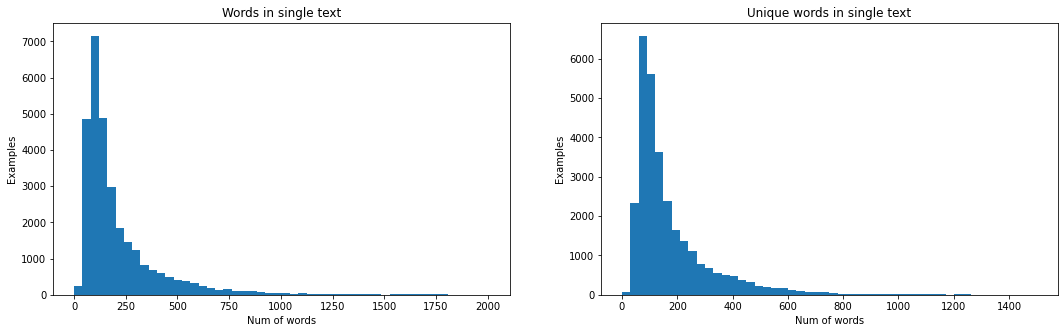

In [28]:
draw_stat_hists(text_stats, 50, label='text')

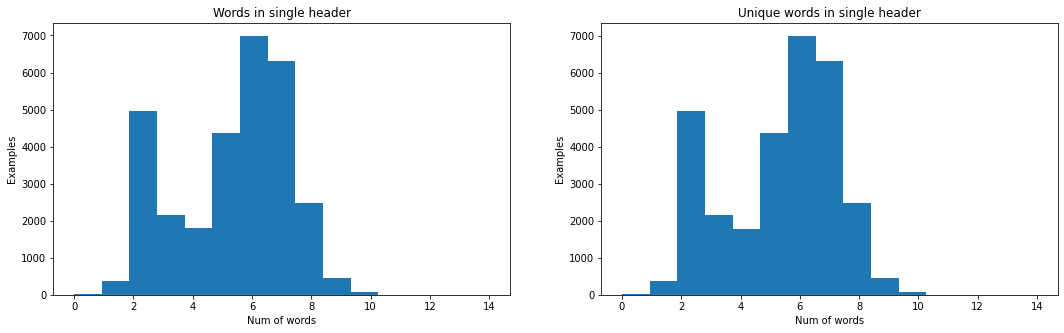

In [30]:
draw_stat_hists(header_stats, 15, label='header')